# **MÓDULO 39 - Exercicio - Aplicando XGboost**

Nessa atividade vocês usarão uma base já connhecida, a base de propensão a compra de carros.
Já utilizamos essa base antes, nessa atividade, você deve carregar a base, realizar os tratamentos necessários, rodar o XGBoost, encontrar as principais variaveis.
Vamos lá!

In [35]:
import xgboost as xgb
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# 1. Carrega a base de dados, verifique os tipos de dados, dados faltantes e drop a coluna ID.


In [2]:
base = pd.read_csv("CARRO_CLIENTES.csv", delimiter=',')

In [3]:
base

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0
...,...,...,...,...,...
995,863,Male,38,59000,0
996,800,Female,47,23500,0
997,407,Female,28,138500,1
998,299,Female,48,134000,1


In [7]:
base.dtypes

User ID          int64
Gender          object
Age              int64
AnnualSalary     int64
Purchased        int64
dtype: object

In [8]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User ID       1000 non-null   int64 
 1   Gender        1000 non-null   object
 2   Age           1000 non-null   int64 
 3   AnnualSalary  1000 non-null   int64 
 4   Purchased     1000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 39.2+ KB


In [5]:
base.isnull().mean() * 100

User ID         0.0
Gender          0.0
Age             0.0
AnnualSalary    0.0
Purchased       0.0
dtype: float64

In [9]:
base = base.drop(columns=['User ID'])

In [10]:
base

,Gender,Age,AnnualSalary,Purchased
0,Male,35,20000,0
1,Male,40,43500,0
2,Male,49,74000,0
3,Male,40,107500,1
4,Male,25,79000,0
...,...,...,...,...
995,Male,38,59000,0
996,Female,47,23500,0
997,Female,28,138500,1
998,Female,48,134000,1


# 2. Aplique o Label Encoder para a coluna Gender e exclua a coluna categórica.

In [11]:
# Substituindo os valores da coluna 'GENDER' por números específicos utilizando o replace
gender_mapping = {'Male': 0, 'Female': 1}
base['Gender'] = base['Gender'].replace(gender_mapping)

C:\Users\emers\AppData\Local\Temp\ipykernel_14388\1559211540.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  base['Gender'] = base['Gender'].replace(gender_mapping)


In [12]:
base

,Gender,Age,AnnualSalary,Purchased
0,0,35,20000,0
1,0,40,43500,0
2,0,49,74000,0
3,0,40,107500,1
4,0,25,79000,0
...,...,...,...,...
995,0,38,59000,0
996,1,47,23500,0
997,1,28,138500,1
998,1,48,134000,1


# 3. Faça a matriz de correlação e analise as váriaveis que parecem ter maior correlação com a váriavel target.

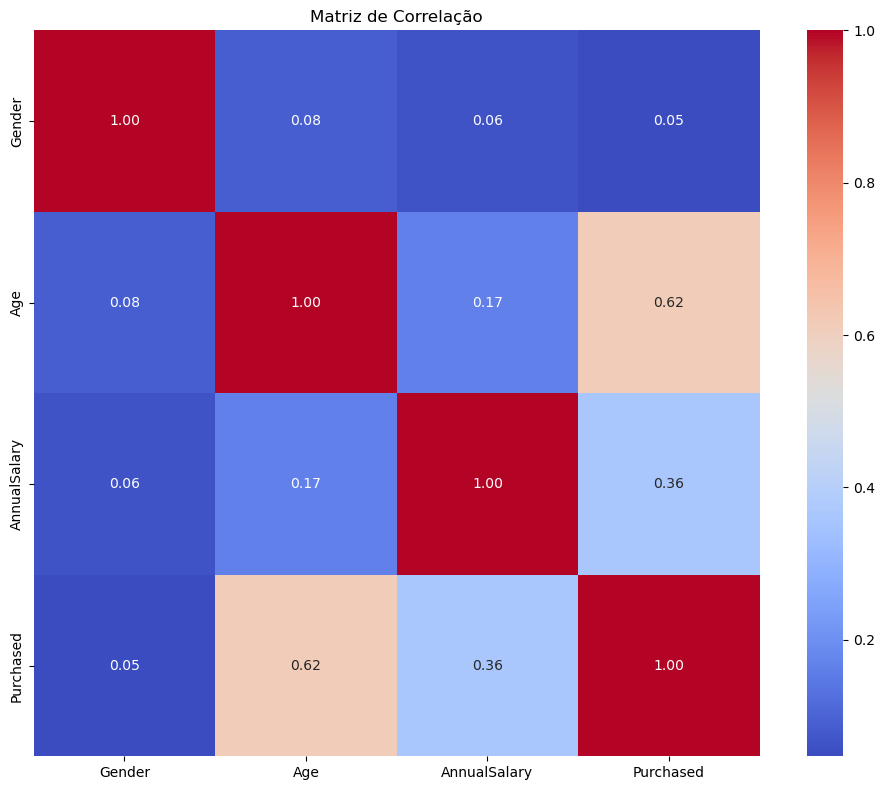

In [13]:
# Matriz de correlação
correlation_matrix = base.corr(numeric_only=True)

# Plot do heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Matriz de Correlação")
plt.tight_layout()
plt.show()

### Tecnicamente, temos três variáveis a serem analisadas neste caso. Podemos afirmar que, em ordem de importância (com base na correlação), a 'Idade' e o 'Salário Anual' apresentam maior relevância, enquanto o 'Gênero' se mostra praticamente irrelevante para a análise.

# 4. Faça a separação da base em X e Y e em seguida nas bases de treino e teste.

In [14]:
X = base.drop('Purchased', axis=1)  # X contém todas as colunas exceto 'Purchased'
Y = base['Purchased']  # Y contém apenas a coluna 'Purchased'

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# 5. Treino o modelo Xgboost com sua base de treino.
Pesquise alguns hyperparametros na bibllioteca para utilizar, utilize ao menos 2.

In [17]:
model_xgboost = xgb.XGBClassifier(
    objective='binary:logistic',     # saída binária (compra = 1, não compra = 0)
    eval_metric='logloss',           # métrica padrão para classificação binária
    random_state=42,                 # garante reprodutibilidade
    n_estimators=100,                # número de árvores (pode testar com 200 ou 300)
    learning_rate=0.1,               # taxa de aprendizado (pode testar 0.01, 0.05)
    max_depth=4,                     # profundidade das árvores (testar 3 a 7)
    subsample=0.8,                   # porcentagem de amostras usadas por árvore (testar 0.7 a 1.0)
    colsample_bytree=0.8,            # porcentagem de features usadas por árvore (testar 0.6 a 1.0)
    reg_alpha=0.1,                   # regularização L1 (pode testar 0, 0.01, 1)
    reg_lambda=1.0                   # regularização L2 (pode testar 0.1, 1, 10)
)

model_xgboost.fit(X_train, Y_train)
model_xgboost.objective

'binary:logistic'

# 6. Realize as previsões para a base de teste e traga as probabilidades das previsões.

In [18]:
Y_pred = model_xgboost.predict(X_test)           # Previsões das classes
Y_pred_prob = model_xgboost.predict_proba(X_test)  # Probabilidades de cada classe

In [30]:
Y_pred_prob[:10] # Mostra somente os 10 primeiros valores de probabilidade

array([[8.3389127e-01, 1.6610873e-01],
       [3.7617743e-02, 9.6238226e-01],
       [9.9946827e-01, 5.3172378e-04],
       [7.0579076e-01, 2.9420924e-01],
       [2.9922682e-01, 7.0077318e-01],
       [1.3826817e-01, 8.6173183e-01],
       [1.2679696e-02, 9.8732030e-01],
       [9.9697256e-01, 3.0274249e-03],
       [9.9135435e-01, 8.6456370e-03],
       [9.7227389e-01, 2.7726138e-02]], dtype=float32)

**[8.3389127e-01]**: Aproximadamente **0.8339**, que é a probabilidade de a amostra pertencer à **classe 0**  
**[1.6610873e-01]**: Aproximadamente **0.1661**, que é a probabilidade de a amostra pertencer à **classe 1**

**[3.7617743e-02]**: Aproximadamente **0.0376**, que é a probabilidade de a amostra pertencer à **classe 0**  
**[9.6238226e-01]**: Aproximadamente **0.9624**, que é a probabilidade de a amostra pertencer à **classe 1**

**[9.9946827e-01]**: Aproximadamente **0.9995**, que é a probabilidade de a amostra pertencer à **classe 0**  
**[5.3172378e-04]**: Aproximadamente **0.0005**, que é a probabilidade de a amostra pertencer à **classe 1**

**[7.0579076e-01]**: Aproximadamente **0.7058**, que é a probabilidade de a amostra pertencer à **classe 0**  
**[2.9420924e-01]**: Aproximadamente **0.2942**, que é a probabilidade de a amostra pertencer à **classe 1**

**[2.9922682e-01]**: Aproximadamente **0.2992**, que é a probabilidade de a amostra pertencer à **classe 0**  
**[7.0077318e-01]**: Aproximadamente **0.7008**, que é a probabilidade de a amostra pertencer à **classe 1**

**[1.3826817e-01]**: Aproximadamente **0.1383**, que é a probabilidade de a amostra pertencer à **classe 0**  
**[8.6173183e-01]**: Aproximadamente **0.8617**, que é a probabilidade de a amostra pertencer à **classe 1**

**[1.2679696e-02]**: Aproximadamente **0.0127**, que é a probabilidade de a amostra pertencer à **classe 0**  
**[9.8732030e-01]**: Aproximadamente **0.9873**, que é a probabilidade de a amostra pertencer à **classe 1**

**[9.9697256e-01]**: Aproximadamente **0.9970**, que é a probabilidade de a amostra pertencer à **classe 0**  
**[3.0274249e-03]**: Aproximadamente **0.0030**, que é a probabilidade de a amostra pertencer à **classe 1**

**[9.9135435e-01]**: Aproximadamente **0.9914**, que é a probabilidade de a amostra pertencer à **classe 0**  
**[8.6456370e-03]**: Aproximadamente **0.0086**, que é a probabilidade de a amostra pertencer à **classe 1**

**[9.7227389e-01]**: Aproximadamente **0.9723**, que é a probabilidade de a amostra pertencer à **classe 0**  
**[2.7726138e-02]**: Aproximadamente **0.0277**, que é a probabilidade de a amostra pertencer à **classe 1**


# 7. Faça a transformação das probabilidades nas previsões binárias e avalie o desempenho do modelo.

In [36]:
# 1. Transformar as probabilidades da classe 1 em previsões binárias (limiar padrão de 0.5)
Y_pred_bin = (Y_pred_prob[:, 1] >= 0.5).astype(int)

# 2. Avaliar o desempenho
print("Accuracy:", accuracy_score(Y_test, Y_pred_bin))
print("Precision:", precision_score(Y_test, Y_pred_bin))
print("Recall:", recall_score(Y_test, Y_pred_bin))
print("F1 Score:", f1_score(Y_test, Y_pred_bin))
print("\nClassification Report:\n", classification_report(Y_test, Y_pred_bin))
print("\nConfusion Matrix:\n", confusion_matrix(Y_test, Y_pred_bin))

Accuracy: 0.92
Precision: 0.95
Recall: 0.8636363636363636
F1 Score: 0.9047619047619048

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.96      0.93       112
           1       0.95      0.86      0.90        88

    accuracy                           0.92       200
   macro avg       0.93      0.91      0.92       200
weighted avg       0.92      0.92      0.92       200


Confusion Matrix:
 [[108   4]
 [ 12  76]]


### O modelo esta com uma excelente acurácia de 92%, e com uma alta precisão (95%) ou seja indicando poucos falsos positivos na previsão de compra. O recall de 86% tras uma boa capacidade de identificar compradores, mesmo que não tenha tanto espaço para melhoria. O F1-score equilibrado (90%) confirma boa generalização. A matriz de confusão confirma os resultados, podemos ver baixo número de erros em ambas as classes.


# 8. Traga a lista com a feature importance.
As features mais importantes são as mesmas que indicaram maior correlação na matriz de correlação?

In [37]:
importances = model_xgboost.get_booster().get_score(importance_type='gain')

# Convertendo o dicionário de importâncias para um DataFrame
importance_df = pd.DataFrame(list(importances.items()), columns=['Feature', 'Importance'])
importance_df['Importance'] = importance_df['Importance'].astype(float)
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

        Feature  Importance
1           Age    4.446671
2  AnnualSalary    4.234300
0        Gender    0.736517


Sim, como eu havia inferido, as features com maior importância são idade e salário anual, enquanto o gênero não é relevante.